# [Credit Card Dataset](https://www.kaggle.com/arjunbhasin2013/ccdata)

Segmentation is the process of dividing customers into groups based on their shared characteristics, such as interests, needs, or location. It is a useful marketing technique as it allows a company to precisely identify the consumer with a specific need and want. Companies can use customer information to tailor and allocate resources to the products demanded the most by the customer.

## Objective

Develop a customer segmentation approach as a means of a marketing strategy.

## Problem Statement

"How does a company segement its customers to address a specific consumer need?"

Let's elaborate the problem a little further. A credit card company has provided us with data about its customers such as, customer's credit card balance, the number of purchases, and how frequently purchases were made etc. We could use this dataset information to identify how company targets customers to increase their credit card sales and improve company revenue in the long run.

## Approach
- Read the dataset 
- Explore the data: Identify variables, datatypes, missing values, outliers
- Data Cleaning and Preprocessing
- Extract Features
- Clustering
- Model Building
- Evaluation

In [1]:
%matplotlib inline
import os
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import sklearn
import nltk
from dateutil.parser import parse

import warnings
warnings.filterwarnings(action="ignore") 

from scipy.stats.mstats import winsorize
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.cluster import AffinityPropagation, estimate_bandwidth, KMeans, MeanShift, SpectralClustering

# Evaluation 
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error
from statsmodels.tools.eval_measures import mse, rmse

In [2]:
file = 'home/kaneeshadawood/creditcards.csv'

# Loading data from the csv file. 
data = pd.read_csv("/home/kaneeshadawood/creditcards.csv")
data.head(10)

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
5,C10006,1809.828751,1.000000,1333.28,0.00,1333.28,0.000000,0.666667,0.000000,0.583333,0.000000,0,8,1800.0,1400.057770,2407.246035,0.000000,12
6,C10007,627.260806,1.000000,7091.01,6402.63,688.38,0.000000,1.000000,1.000000,1.000000,0.000000,0,64,13500.0,6354.314328,198.065894,1.000000,12
7,C10008,1823.652743,1.000000,436.20,0.00,436.20,0.000000,1.000000,0.000000,1.000000,0.000000,0,12,2300.0,679.065082,532.033990,0.000000,12
8,C10009,1014.926473,1.000000,861.49,661.49,200.00,0.000000,0.333333,0.083333,0.250000,0.000000,0,5,7000.0,688.278568,311.963409,0.000000,12
9,C10010,152.225975,0.545455,1281.60,1281.60,0.00,0.000000,0.166667,0.166667,0.000000,0.000000,0,3,11000.0,1164.770591,100.302262,0.000000,12


## The Dataset

The dataset was obtained from [Kaggle](https://www.kaggle.com/arjunbhasin2013/ccdata). This summarizes the 18 behavioral variables of the credit card customers. The features of the dataset are as follows:

- CUST_ID : Identification of Credit Card holder (Categorical) 
- BALANCE : Balance amount left in their account to make purchases 
- BALANCE_FREQUENCY : How frequently the Balance is updated, score between 0 and 1 (1 = frequently updated, 0 = not frequently updated) 
- PURCHASES : Amount of purchases made from account 
- ONEOFF_PURCHASES : Maximum purchase amount done in one-go 
- INSTALLMENTS_PURCHASES : Amount of purchase done in installment 
- CASH_ADVANCE : Cash in advance given by the user 
- PURCHASES_FREQUENCY : How frequently the Purchases are being made, score between 0 and 1 (1 = frequently purchased, 0 = not frequently purchased) 
- ONEOFFPURCHASESFREQUENCY : How frequently Purchases are happening in one-go (1 = frequently purchased, 0 = not frequently purchased) 
- PURCHASESINSTALLMENTSFREQUENCY : How frequently purchases in installments are being done (1 = frequently done, 0 = not frequently done) 
- CASHADVANCEFREQUENCY : How frequently the cash in advance being paid 
- CASHADVANCETRX : Number of Transactions made with "Cash in Advanced" 
- PURCHASES_TRX : Number of purchase transactions made 
- CREDIT_LIMIT : Limit of Credit Card for user 
- PAYMENTS : Amount of Payment done by user 
- MINIMUM_PAYMENTS : Minimum amount of payments made by user 
- PRCFULLPAYMENT : Percent of full payment paid by user 
- TENURE : Tenure of credit card service for user

Let's now discover the contents of the data:

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
CUST_ID                             8950 non-null object
BALANCE                             8950 non-null float64
BALANCE_FREQUENCY                   8950 non-null float64
PURCHASES                           8950 non-null float64
ONEOFF_PURCHASES                    8950 non-null float64
INSTALLMENTS_PURCHASES              8950 non-null float64
CASH_ADVANCE                        8950 non-null float64
PURCHASES_FREQUENCY                 8950 non-null float64
ONEOFF_PURCHASES_FREQUENCY          8950 non-null float64
PURCHASES_INSTALLMENTS_FREQUENCY    8950 non-null float64
CASH_ADVANCE_FREQUENCY              8950 non-null float64
CASH_ADVANCE_TRX                    8950 non-null int64
PURCHASES_TRX                       8950 non-null int64
CREDIT_LIMIT                        8949 non-null float64
PAYMENTS                            8950 non-null float64
MINIMUM_PAYMENTS            

The dataset includes 8950 observations which includes numeric variables(int and float) and one object variable('CUST_ID'). 

Let's move on to finding the number of unique observations in each feature.

In [4]:
# what are the unique values is each field?
data.nunique()

CUST_ID                             8950
BALANCE                             8871
BALANCE_FREQUENCY                     43
PURCHASES                           6203
ONEOFF_PURCHASES                    4014
INSTALLMENTS_PURCHASES              4452
CASH_ADVANCE                        4323
PURCHASES_FREQUENCY                   47
ONEOFF_PURCHASES_FREQUENCY            47
PURCHASES_INSTALLMENTS_FREQUENCY      47
CASH_ADVANCE_FREQUENCY                54
CASH_ADVANCE_TRX                      65
PURCHASES_TRX                        173
CREDIT_LIMIT                         205
PAYMENTS                            8711
MINIMUM_PAYMENTS                    8636
PRC_FULL_PAYMENT                      47
TENURE                                 7
dtype: int64

Let's missing values and outliers stemmed during data collection:

In [5]:
#missing data
total = data.isnull().sum().sort_values(ascending=False)
percent = (data.isnull().sum()/data.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(10)

,Total,Percent
MINIMUM_PAYMENTS,313,0.034972
CREDIT_LIMIT,1,0.000112
TENURE,0,0.000000
PURCHASES_FREQUENCY,0,0.000000
BALANCE,0,0.000000
BALANCE_FREQUENCY,0,0.000000
PURCHASES,0,0.000000
ONEOFF_PURCHASES,0,0.000000
INSTALLMENTS_PURCHASES,0,0.000000
CASH_ADVANCE,0,0.000000


`MINIMUM_PAYMENTS` and `CREDIT_LIMIT` fields have a significant number of missing values. 

Let us now detect the outliers in our dataset. Outliers are extreme values that are outside the range of what is expected and unlike the other data. This contribute noise to our data.

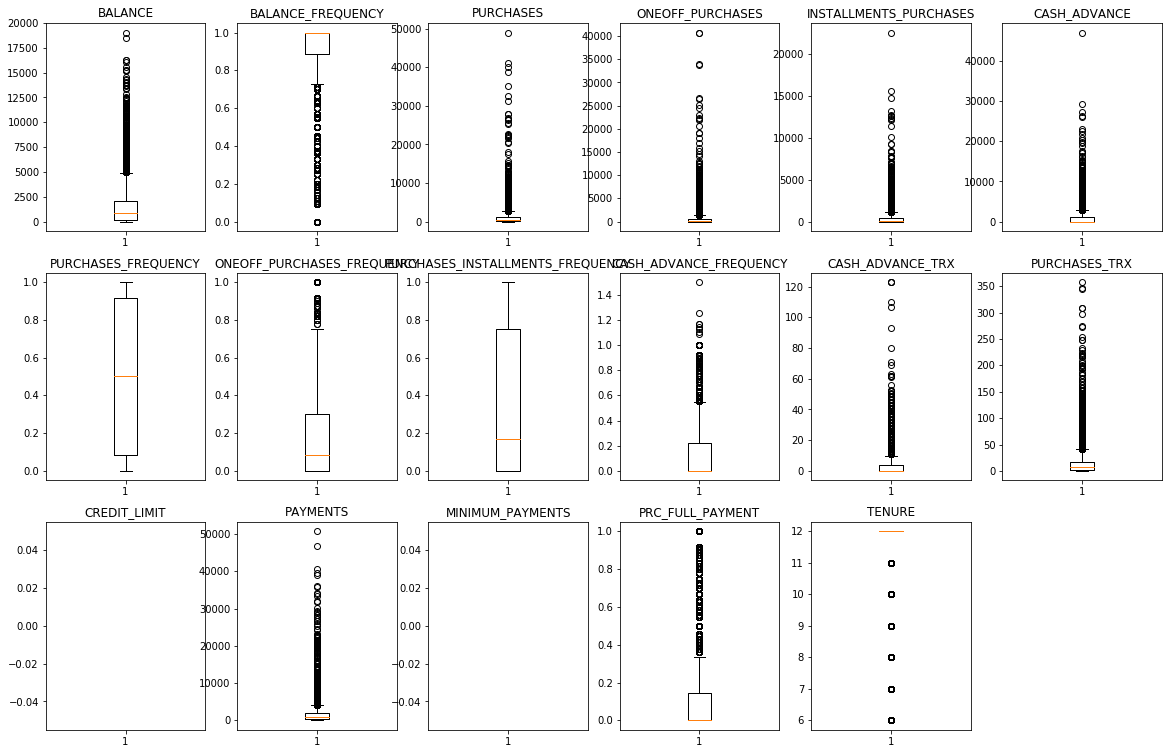

In [6]:
# Using the box plot to detect outliers.

plt.figure(figsize = (20, 13))

plt.subplot(3,6,1)
plt.boxplot(data["BALANCE"])
plt.title("BALANCE")

plt.subplot(3,6,2)
plt.boxplot(data["BALANCE_FREQUENCY"])
plt.title("BALANCE_FREQUENCY")

plt.subplot(3,6,3)
plt.boxplot(data["PURCHASES"])
plt.title("PURCHASES")

plt.subplot(3,6,4)
plt.boxplot(data["ONEOFF_PURCHASES"])
plt.title("ONEOFF_PURCHASES")

plt.subplot(3,6,5)
plt.boxplot(data["INSTALLMENTS_PURCHASES"])
plt.title("INSTALLMENTS_PURCHASES")

plt.subplot(3,6,6)
plt.boxplot(data["CASH_ADVANCE"])
plt.title("CASH_ADVANCE")

plt.subplot(3,6,7)
plt.boxplot(data["PURCHASES_FREQUENCY"])
plt.title("PURCHASES_FREQUENCY")

plt.subplot(3,6,8)
plt.boxplot(data["ONEOFF_PURCHASES_FREQUENCY"])
plt.title("ONEOFF_PURCHASES_FREQUENCY")

plt.subplot(3,6,9)
plt.boxplot(data["PURCHASES_INSTALLMENTS_FREQUENCY"])
plt.title("PURCHASES_INSTALLMENTS_FREQUENCY")

plt.subplot(3,6,10)
plt.boxplot(data["CASH_ADVANCE_FREQUENCY"])
plt.title("CASH_ADVANCE_FREQUENCY")

plt.subplot(3,6,11)
plt.boxplot(data["CASH_ADVANCE_TRX"])
plt.title("CASH_ADVANCE_TRX")

plt.subplot(3,6,12)
plt.boxplot(data["PURCHASES_TRX"])
plt.title("PURCHASES_TRX")

plt.subplot(3,6,13)
plt.boxplot(data["CREDIT_LIMIT"])
plt.title("CREDIT_LIMIT")

plt.subplot(3,6,14)
plt.boxplot(data["PAYMENTS"])
plt.title("PAYMENTS")

plt.subplot(3,6,15)
plt.boxplot(data["MINIMUM_PAYMENTS"])
plt.title("MINIMUM_PAYMENTS")

plt.subplot(3,6,16)
plt.boxplot(data["PRC_FULL_PAYMENT"])
plt.title("PRC_FULL_PAYMENT")

plt.subplot(3,6,17)
plt.boxplot(data["TENURE"])
plt.title("TENURE")

plt.show()

The box plots above indicate that we have a significant amount of outliers in most of our fields. Let's confirm exact number of outliers by using the Interquartile Range method(IQR). The IQR is calculated by taking into account the difference between the 75th and the 25th percentiles of the data and defines the box in a box and whisker plot.

In [7]:
columns = ['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE',
           'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',
           'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT','TENURE']
           
for col in columns:
    q75, q25 = np.percentile(data[col], [75 ,25])
    iqr = q75 - q25


    min_val = q25 - (iqr*1.5)
    max_val = q75 + (iqr*1.5)

    print("Number of outliers for {} is: {} ".format(col, len((np.where((data[col] > max_val) 
                      | (data[col] < min_val))[0])), len((np.where((data[col] > max_val) | 
                                                    (data[col] < min_val))[0])))) 

Number of outliers for BALANCE is: 695 
Number of outliers for BALANCE_FREQUENCY is: 1493 
Number of outliers for PURCHASES is: 808 
Number of outliers for ONEOFF_PURCHASES is: 1013 
Number of outliers for INSTALLMENTS_PURCHASES is: 867 
Number of outliers for CASH_ADVANCE is: 1030 
Number of outliers for PURCHASES_FREQUENCY is: 0 
Number of outliers for ONEOFF_PURCHASES_FREQUENCY is: 782 
Number of outliers for PURCHASES_INSTALLMENTS_FREQUENCY is: 0 
Number of outliers for CASH_ADVANCE_FREQUENCY is: 525 
Number of outliers for CASH_ADVANCE_TRX is: 804 
Number of outliers for PURCHASES_TRX is: 766 
Number of outliers for CREDIT_LIMIT is: 0 
Number of outliers for PAYMENTS is: 808 
Number of outliers for MINIMUM_PAYMENTS is: 0 
Number of outliers for PRC_FULL_PAYMENT is: 1474 
Number of outliers for TENURE is: 1366 


## Data Cleaning and Preprocessing

In our initial data exploration phase we discovered that both 'MINIMUM_PAYMENTS' and 'CREDIT_LIMIT' have missing values. Since these are important fields in the dataset, I will impute the missing values of these attributes with their median. I chose to impute the missing values with its median because this dataset contains a great number of outliers.

I chose to drop the column 'CUST_ID' column since it does not add meaningful insights into our findings.

In [8]:
# Filling in Missing Values with the mean
data.loc[(data['MINIMUM_PAYMENTS'].isnull()==True),'MINIMUM_PAYMENTS']=data['MINIMUM_PAYMENTS'].median()
data.loc[(data['CREDIT_LIMIT'].isnull()==True),'CREDIT_LIMIT']=data['CREDIT_LIMIT'].median()

# Dropping columns
data = data.drop(columns=['CUST_ID']) 

In [9]:
# Confirming the missing values
data.isnull().sum()

BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

I will use the z-score to limit the values of the outliers. Z-scores are the number of standard deviations above and below the mean that each value falls. I believe that this method would help us detect the outliers and drop the extreme values above and below a certain threshold.

In [10]:
#Using the Z-score to drop outliers
from scipy import stats
z = np.abs(stats.zscore(data))
print(z)

threshold = 3
print(np.where(z > 3))

data_cleaned = data[(z < 3).all(axis=1)]

[[0.73198937 0.24943448 0.42489974 ... 0.3024     0.52555097 0.36067954]
 [0.78696085 0.13432467 0.46955188 ... 0.09749953 0.2342269  0.36067954]
 [0.44713513 0.51808382 0.10766823 ... 0.0932934  0.52555097 0.36067954]
 ...
 [0.7403981  0.18547673 0.40196519 ... 0.32687479 0.32919999 4.12276757]
 [0.74517423 0.18547673 0.46955188 ... 0.33830497 0.32919999 4.12276757]
 [0.57257511 0.88903307 0.04214581 ... 0.3243581  0.52555097 4.12276757]]
(array([   6,   19,   20, ..., 8947, 8948, 8949]), array([ 3, 14, 14, ..., 16, 16, 16]))


In [12]:
# Confirming the shape of the clean data:
data_cleaned.shape

(7434, 17)

I will now use Scikit-Learn's `StandardScaler` method to normalize and standardize the dataset. Standardization is the process of rescaling one or more attributes so that they have a mean value of 0 and a standard deviation of 1. It is required that we normalize the data before we move on to Clustering.

In [13]:
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler, normalize

# Get column names first
cols = data_cleaned.columns
# Create the Scaler object
scaler = preprocessing.StandardScaler()
# Fit your data on the scaler object
scaled_data = scaler.fit_transform(data_cleaned)
scaled_data = pd.DataFrame(scaled_data, columns=cols)
  
# Normalizing the Data 
normalized_data = normalize(scaled_data) 
  
# Converting the numpy array into a pandas DataFrame 
normalized_data = pd.DataFrame(normalized_data, columns=cols) 

In [14]:
# Descriptive Statistics
normalized_data.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,-0.302935,-0.125308,-0.240001,-0.203355,-0.167646,-0.203534,-0.301231,-0.250231,-0.261280,-0.258468,-0.219748,-0.248901,-0.382298,-0.285425,-0.211092,-0.198872,0.116806
1,0.216800,0.015516,-0.125061,-0.092543,-0.108396,0.795487,-0.208688,-0.113875,-0.155044,0.150489,0.072826,-0.135793,0.174023,0.332558,0.108544,0.039611,0.053156
2,0.208058,0.133288,0.005039,0.111046,-0.164074,-0.140201,0.334420,0.723773,-0.234683,-0.178041,-0.151369,-0.000986,0.307305,-0.121203,0.016537,-0.136989,0.080460
3,0.083616,-0.379623,0.232644,0.430343,-0.203602,-0.120697,-0.324735,-0.121224,-0.291222,-0.053068,-0.106680,-0.233909,0.381340,-0.288908,-0.109232,-0.169992,0.099844
4,-0.113661,0.197342,-0.274314,-0.199699,-0.242921,-0.207576,-0.387447,-0.144635,-0.347462,-0.263601,-0.224112,-0.279082,-0.363893,-0.164500,-0.163532,-0.202821,0.119126


**Correlation Check**

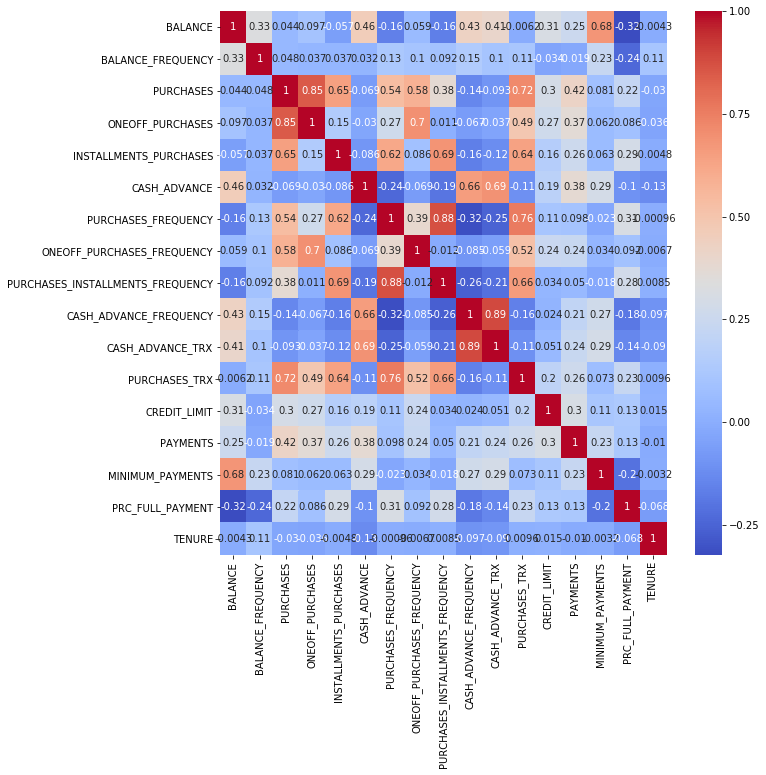

In [15]:
plt.figure(figsize = (10, 10))
sns.heatmap(normalized_data.corr(), annot=True, cmap='coolwarm', 
            xticklabels=data_cleaned.columns,
            yticklabels=data_cleaned.columns)

The heatmap above gives us a clear understanding of the correlation matrices between variables. The highly correlated variables are as follows:

- CASH_ADVANCE_FREQUENCY and CASH_ADVANCE_TRX (0.89)
- PURCHASES_FREQUENCY and PURCHASES_INSTALLMENTS_FREQUENCY (0.88)
- PURCHASES and ONEOFF_PURCHASES (0.85)

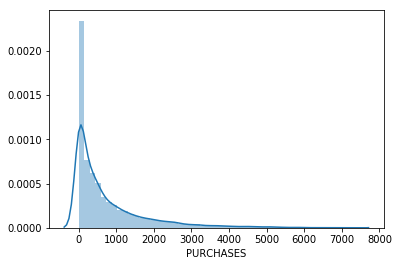

In [18]:
# check the distribution purchases
sns.distplot(data_cleaned['PURCHASES'])

In [23]:
# What features are highly correlated with Purchases?

corr = normalized_data.corr()

#Correlation with output variable
corr_data = abs(corr["PURCHASES"])
#Selecting highly correlated features
corr_features = corr_data[corr_data > 0.5]
corr_features

PURCHASES                     1.000000
ONEOFF_PURCHASES              0.847604
INSTALLMENTS_PURCHASES        0.648317
PURCHASES_FREQUENCY           0.539434
ONEOFF_PURCHASES_FREQUENCY    0.583529
PURCHASES_TRX                 0.720373
Name: PURCHASES, dtype: float64

More credit card purchases are made on a one-off basis and it appears to be highly correlated to purchases(0.85).

## Clustering

 Clustering is an unsupervised machine learning method where data points are grouped together according to a given “distance metric”.

Since we are dealing with an unsupervised learning problem, I chose to use the Clustering method to generate features for our model. Clustering is a useful method of determining the associations between our data points. The goal of this algorithm is to find K groups in the data. 

The K-Means Clustering algorithm works as follows:

- Choose a predetermined number of clusters.
- Find the centroids for each of these clusters, essentially the means.
- Assign each data point to its nearest cluster based on the squared Euclidean distance.
- Create new centroids by taking the mean of all data points assigned to each centroid.

The KMeans algorithm clusters data by trying to separate samples in n groups of equal variance, minimizing a criterion known as the `inertia`. Inertia is the sum of squared differences between the centroid of a cluster and the data points of that cluster. 

Let's now define the clusters and then measure the cluster quality through `inertia` and `silhouette score` methods.

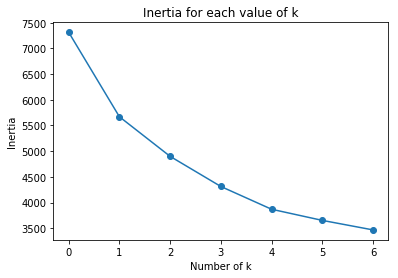

In [25]:
X = normalized_data

n_clusters = 8
inertia = []
k = []
for i in range(1,n_clusters):
    kmean= KMeans(i)
    kmean.fit(X)
    inertia.append(kmean.inertia_)  
    k.append(i)

plt.plot(inertia, 'o-')
plt.title('Inertia for each value of k')
plt.xlabel('Number of k')
plt.ylabel('Inertia')
plt.show()

In [26]:
# Fitting the k to 6 cluters since it has the lowest inertia
kmean= KMeans(6)
kmean.fit(X)
labels=kmean.labels_

In [27]:
clusters=pd.concat([data_cleaned, pd.DataFrame({'cluster':labels})], axis=1)
clusters.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0.0,2.0,1000.0,201.802084,139.509787,0.000000,12.0,1.0
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4.0,0.0,7000.0,4103.032597,1072.340217,0.222222,12.0,4.0
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0.0,12.0,7500.0,622.066742,627.284787,0.000000,12.0,3.0
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1.0,1.0,7500.0,0.000000,312.343947,0.000000,12.0,5.0
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0.0,1.0,1200.0,678.334763,244.791237,0.000000,12.0,1.0


Let us now visualize the features of our clusters:

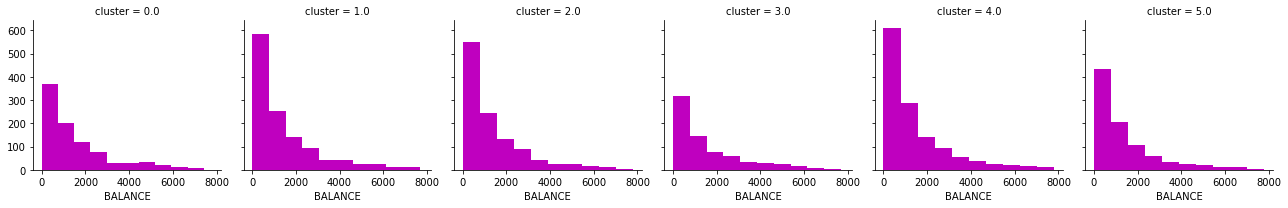

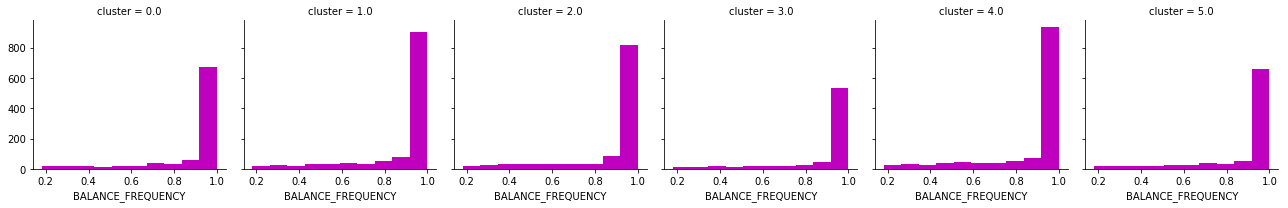

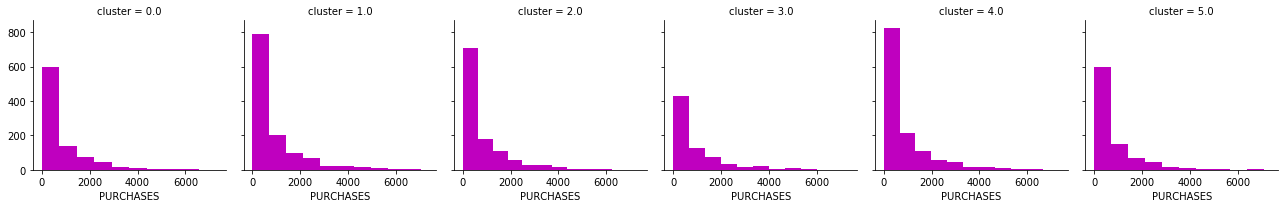

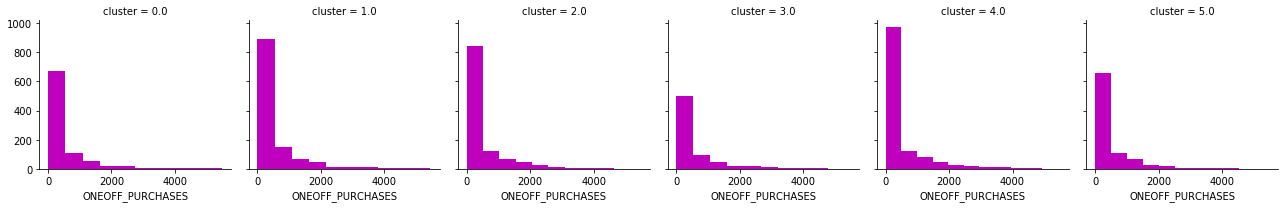

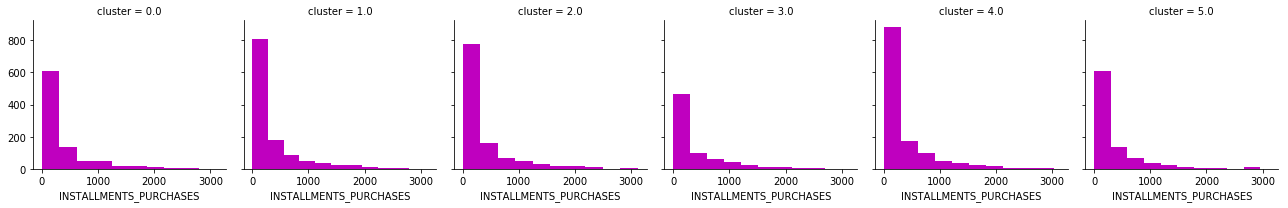

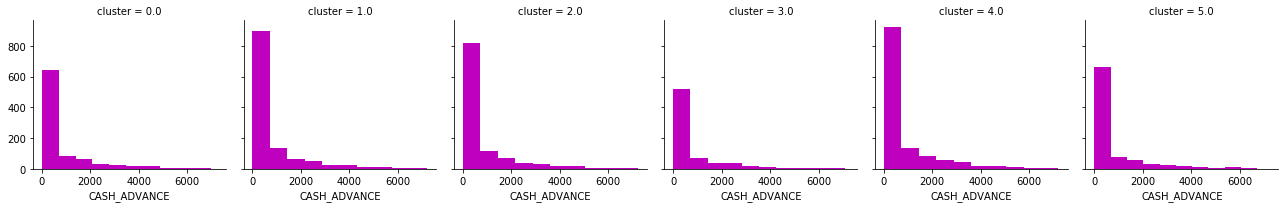

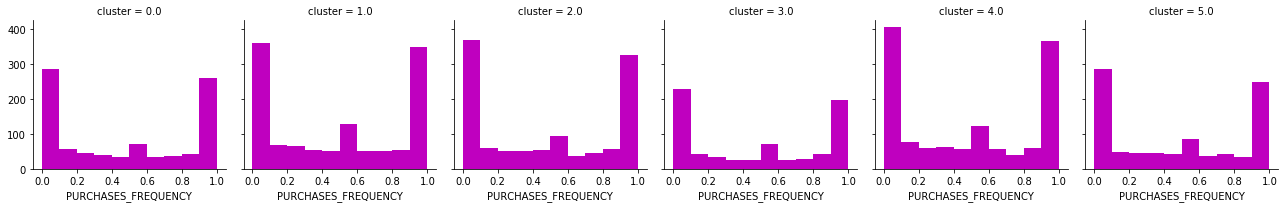

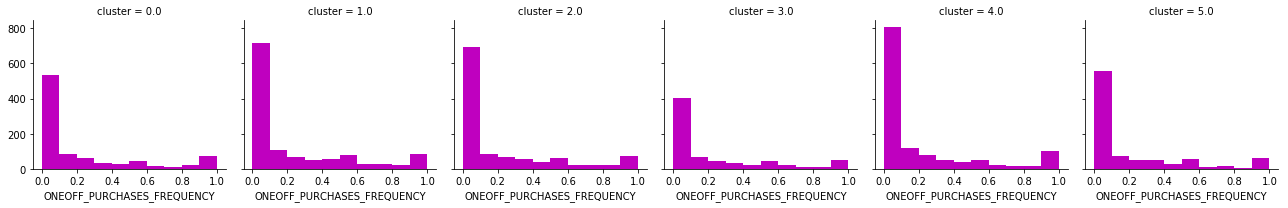

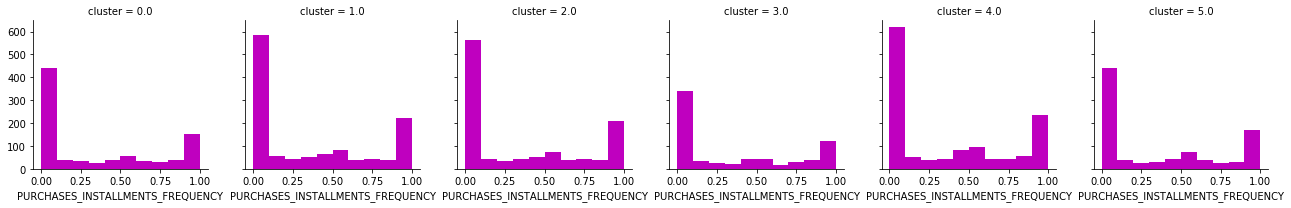

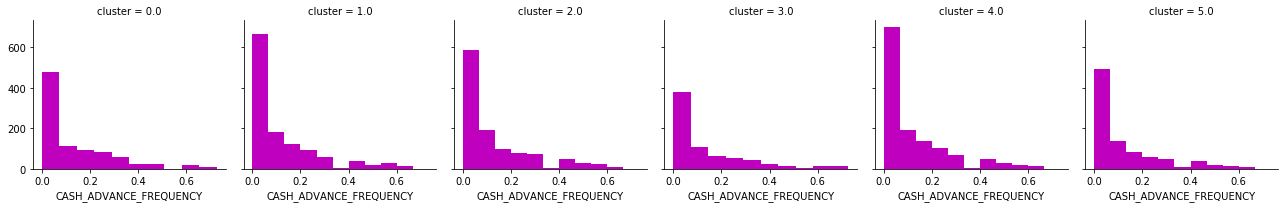

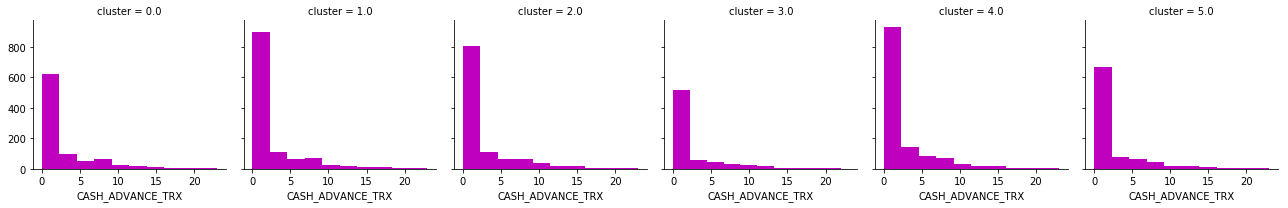

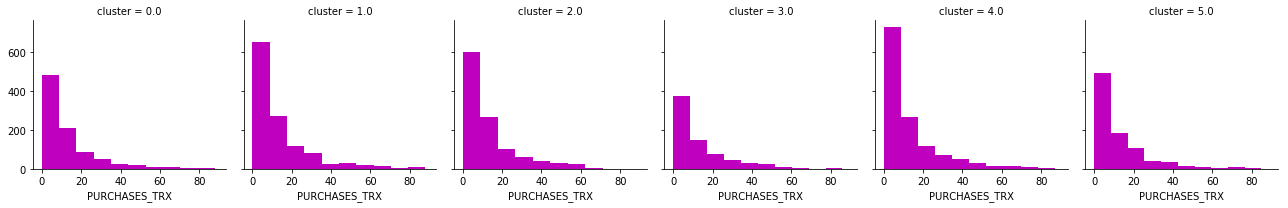

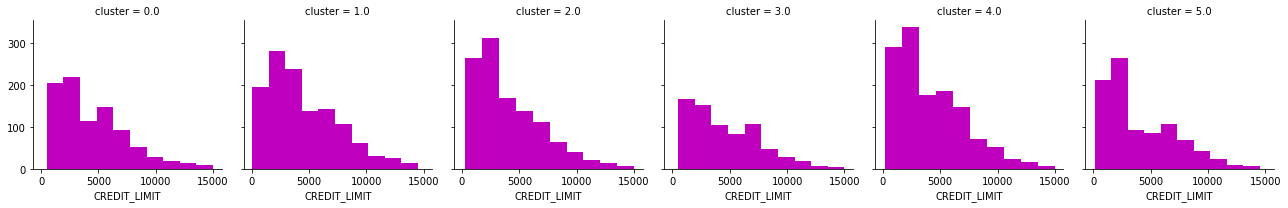

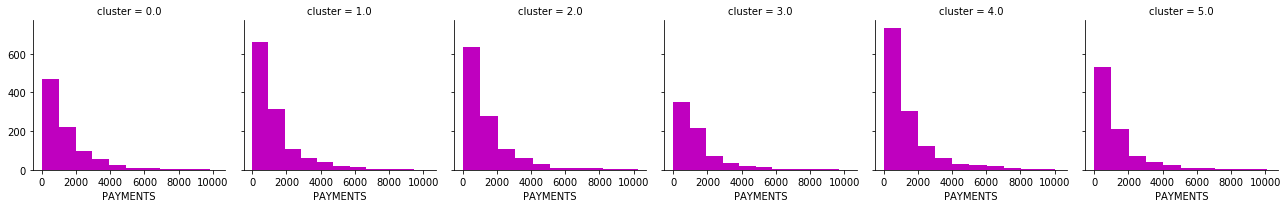

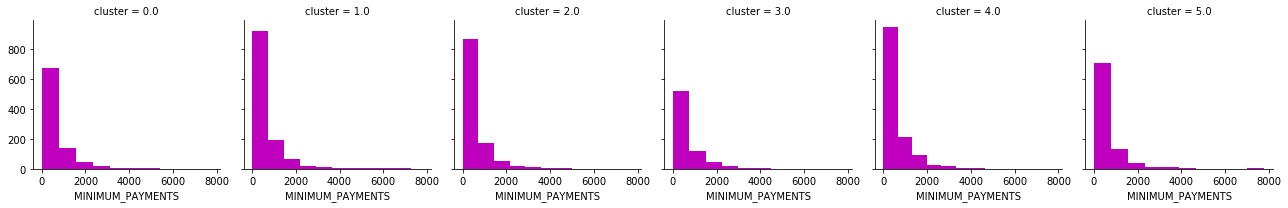

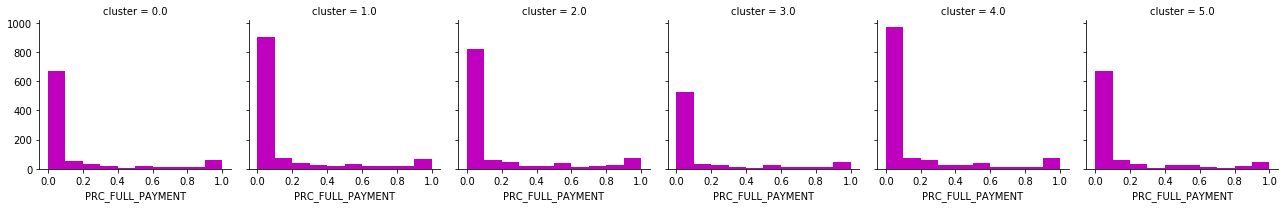

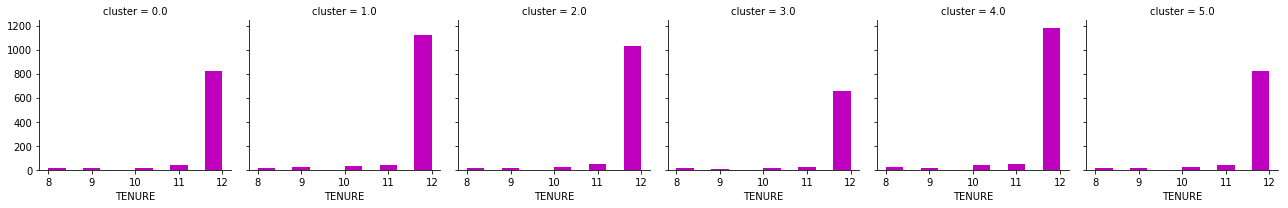

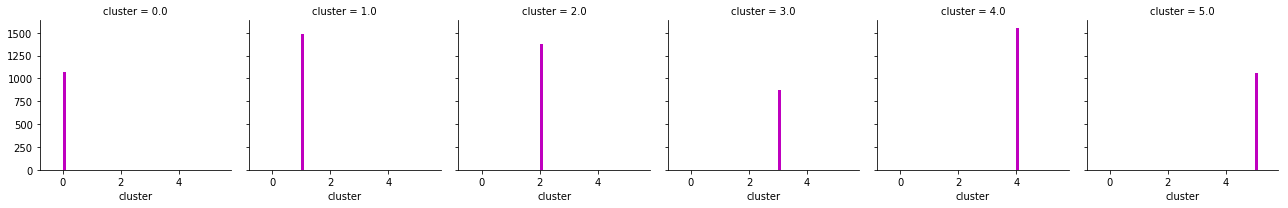

In [28]:
# Visualizing the distribution of features
for c in clusters:
    grid= sns.FacetGrid(clusters, col='cluster')
    grid.map(plt.hist, c, color="m")

**Silhouette Scores**

Silhouette Coefficient is a measure of how similar an object is to its own cluster (cohesion) compared to other clusters (separation). 

In [30]:
from sklearn.metrics import silhouette_samples, silhouette_score

# Finding the Silhouette score
for x in range(2, 7):
    model = KMeans(n_clusters = x, random_state=42)
    label = model.fit_predict(X)
    print('Silhouette-Score for', x,  'Clusters: ', silhouette_score(normalized_data, label))

Silhouette-Score for 2 Clusters:  0.2180752395709799
Silhouette-Score for 3 Clusters:  0.19880913242903378
Silhouette-Score for 4 Clusters:  0.20193307649544534
Silhouette-Score for 5 Clusters:  0.21491151875190168
Silhouette-Score for 6 Clusters:  0.2039709695857146


Our analysis indicates that we have lower silhouette scores. Let us now apply PCA to extract features.

## Feature Extraction through PCA

Principal Component Analysis(PCA) is a technique used to transform a number of (possibly) correlated variables into a (smaller) number of uncorrelated variables called principal components. This would help us reduce dimensionalities, extract features, and improve our clusters.

In [32]:
# apply PCA and display clustering metrics
for y in range(2, 5):
    print("PCA with # of components: ", y)
    pca = PCA(n_components=y)
    data2 = pca.fit_transform(normalized_data)
    for x in range(2, 7):
        model = KMeans(n_clusters = x, )
        label = model.fit_predict(data2)
        print('Silhouette-Score for', x,  'Clusters: ', silhouette_score(data2, label) , '    Inertia: ',
               model.inertia_)
    print()

PCA with # of components:  2
Silhouette-Score for 2 Clusters:  0.4302090241932265     Inertia:  1830.1809387109165
Silhouette-Score for 3 Clusters:  0.43834394878167837     Inertia:  1141.4011466253492
Silhouette-Score for 4 Clusters:  0.42030659946104226     Inertia:  786.3771442707284
Silhouette-Score for 5 Clusters:  0.3983425913882635     Inertia:  620.2183177609089
Silhouette-Score for 6 Clusters:  0.3981497571579941     Inertia:  506.61656140803774

PCA with # of components:  3
Silhouette-Score for 2 Clusters:  0.3605453038153814     Inertia:  2622.3336719685503
Silhouette-Score for 3 Clusters:  0.3586373153754726     Inertia:  1880.684392861006
Silhouette-Score for 4 Clusters:  0.38361203472947725     Inertia:  1343.6775438098853
Silhouette-Score for 5 Clusters:  0.36310169059189346     Inertia:  1102.297862925316
Silhouette-Score for 6 Clusters:  0.35634915658284744     Inertia:  972.3386991505602

PCA with # of components:  4
Silhouette-Score for 2 Clusters:  0.314398317377367

New dataframe with the most relevant features: Data shape: (7434, 6)


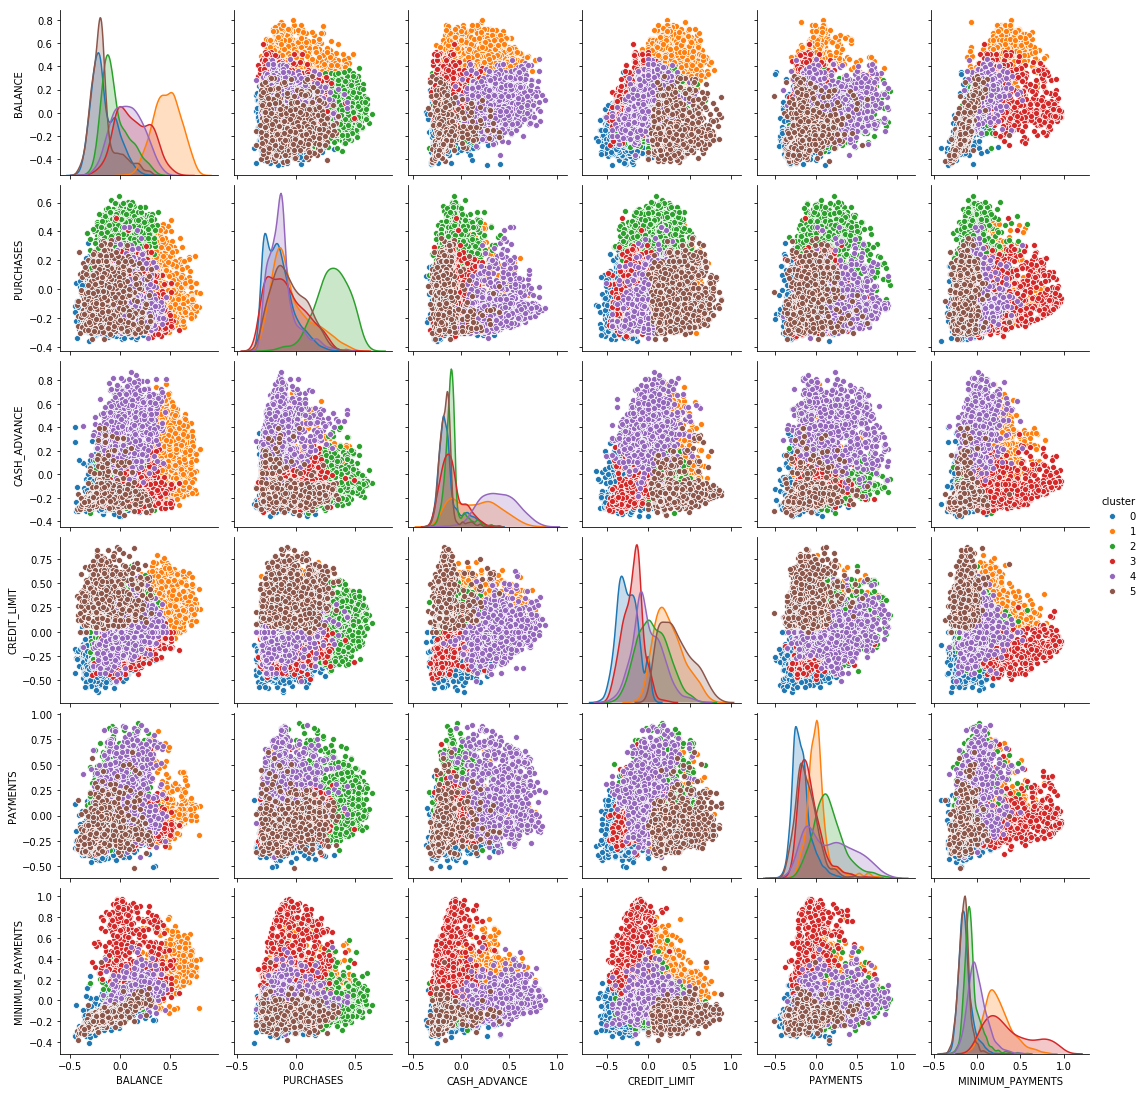

In [35]:
# Using Seaborn's pairplot to discover features

# creating a 'features' variable
features = ["BALANCE", "PURCHASES", "CASH_ADVANCE", "CREDIT_LIMIT", "PAYMENTS", "MINIMUM_PAYMENTS"]

# Creating a new dataframe with features
data2 = pd.DataFrame(normalized_data[features])

print('New dataframe with the most relevant features: Data shape: ' + str(data2.shape))

# apply KMeans clustering
model = KMeans(n_clusters = 6)
label = model.fit_predict(data2)

# creating 'cluster' column
data2['cluster'] = label
features.append('cluster')

# visualizing through Seaborn pairplot
sns.pairplot(data2[features], hue='cluster')

The company can use the above clustering data to segment the customers according to their purchase patterns. I chose the above features to visualize the credit card customers purchasing patterns. The correlations above depict how one feature correlates toward another. 

- Cluster 0: `The Avarage Person` Has the lowest purchases, lower payments, and low credit limits
- Cluster 1: `Active Users` Have the average to high credit limits and are making more purchases in general.
- Cluster 2: `Spenders` They make more purchases that any other group with high balances, cash advances and payment
- Cluster 3: `Borrowers` Average to high credit cluster with customers who take more cash in advance
- Cluster 4: `High Risk Takers` They have a high minimum payments but low credit limits
- Cluster 5: `The Unpredictables` Average to high credit limit customers who do not make much use of their credit cards. It would be difficult to determine which marketing strategy to apply to them.

Let us now use other approaches of clustering to segment the customers:

## Mean Shift

Mean Shift is a clustering technique which uses the Kernel Density Estimation(KDE) to calculate the probability of the data points.  Here we set the bandwidth. This function automatically derives a bandwidth
number based on an inspection of the distances among points in the data.


In [36]:
from sklearn.datasets.samples_generator import make_blobs
from sklearn.model_selection import train_test_split

# Let's segment the data according to the purchases frequency
X = data_cleaned.drop(columns=['PURCHASES_FREQUENCY'])
y = data_cleaned['PURCHASES_FREQUENCY']

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.8,
    random_state=42)

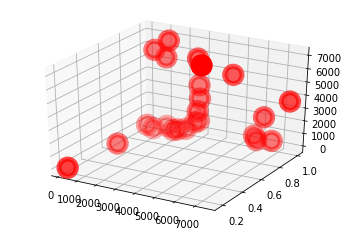

Number of estimated clusters: 6


In [49]:
from sklearn.cluster import MeanShift, estimate_bandwidth
from mpl_toolkits.mplot3d import Axes3D 

bandwidth = estimate_bandwidth(X_train, quantile=0.2, n_samples=1000)

# Declare and fit the model.
ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
ms.fit(X_train)

# Extract cluster assignments for each data point.
cluster_centers = ms.cluster_centers_

# Count our clusters.
n_clusters_ = len(np.unique(labels))
   
# Finally We plot the data points 
# and centroids in a 3D graph. 
fig = plt.figure() 
  
ax = fig.add_subplot(111, projection ='3d') 
  
ax.scatter(cluster_centers[:, 0], cluster_centers[:, 1], 
           cluster_centers[:, 2], marker ='o', color ='red', 
           s = 300, linewidth = 5, zorder = 10) 
  
plt.show() 

print("Number of estimated clusters: {}".format(n_clusters_))

Our MeanShift algorithm predicted 6 clusters, which I believe is an ideal number to segment our customers. 

## Spectral Clustering

Spectral Clustering algorithm treats the data points as nodes of a graph. It defines the similarity matrix of `n x n` dimensions, where n indicates the number of data points in the dataset.

In [52]:
from sklearn.cluster import SpectralClustering

# Declare and fit the model.
sc = SpectralClustering(n_clusters=n_clusters)
sc.fit(X_train)

#Predicted clusters.
predict=sc.fit_predict(X_train)

print("Number of estimated clusters: {}".format(n_clusters_))
print('Comparing the assigned categories to the ones in the data:')
print(pd.crosstab(y_train,predict)) 

Number of estimated clusters: 6
Comparing the assigned categories to the ones in the data:
col_0                1  2  3    4
PURCHASES_FREQUENCY              
0.000000             0  0  0  298
0.083333             0  0  0  128
0.090909             0  0  0    8
0.100000             0  0  0    4
0.111111             0  0  0    4
0.125000             0  0  0    3
0.166667             0  0  0   63
0.181818             0  0  0    4
0.200000             0  0  0    1
0.222222             0  0  0    5
0.250000             0  0  0   57
0.272727             0  0  0    2
0.300000             0  0  0    4
0.333333             0  0  0   61
0.363636             0  0  0    1
0.400000             0  0  0    1
0.416667             0  0  0   55
0.444444             0  0  0    2
0.454545             0  0  0    5
0.500000             0  0  0   62
0.555556             0  0  0    1
0.583333             0  0  0   65
0.600000             0  0  0    3
0.625000             0  0  0    1
0.636364             0  0

## Affinity Propagation



In [53]:
# Declare the model and fit it.
af = AffinityPropagation().fit(X_train)
print('AffinityPropagation')

# Pull the number of clusters and cluster assignments for each data point.
cluster_centers_indices = af.cluster_centers_indices_
n_clusters_ = len(cluster_centers_indices)
labels = af.labels_

print('Estimated number of clusters: {}'.format(n_clusters_))

AffinityPropagation
Estimated number of clusters: 82


# Conclusion

We approached the customer segmentation problem through analyzing the credit card data set. I gained insights into the dataset through exploring the data, preprocessing, and extracting relevant features to build our clusters. Next, I used different clustering approaches such as K-means Clustering, Mean Shift, Spectral Clustering, and Affinity Propagation to determine the number of clusters in evaluating the models.

The K-Means clustering algorithms proves to be the most efficient in our analysis as it captured the most relevant customer grouping criterias. I used the inertia plot and silhouette scores to evaluate the clusters. Next, I used PCA to extract features and improve our clustering. I then, created 6 clusters and categorized them into groups with similar charactericts. The correlations between these features helped us analyze which group of customers to target for our business. For instance, the company could target the spenders in times where the sales are low, as this would help the business increase their revenue gradually. 

## Future Work

- Use a different set of features and analyze the performance of the k-means algorithm.
- Apply other clustering techniques to evaluate the results.